#  EDA PROJECT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
df = pd.read_csv("C:/Users/ASUS/Downloads/Avocado Price Regression.csv")

In [ ]:
for c in ["Unnamed: 0", "index"]:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

In [ ]:
target = "AveragePrice"
if target not in df.columns:
    raise KeyError(f"Target column '{target}' not found")

In [ ]:
X = df.drop(columns=[target, "Date"], errors="ignore")
y = df[target].astype(float)

In [ ]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
for c in num_cols:
    X[c] = X[c].fillna(X[c].median())
for c in cat_cols:
    X[c] = X[c].fillna(X[c].mode().iloc[0] if not X[c].mode().empty else "")

In [ ]:
X_enc = pd.get_dummies(X, drop_first=True)
print("Feature matrix shape after encoding:", X_enc.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Training finished.")

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}  RMSE: {rmse:.4f}  R2: {r2:.4f}")

joblib.dump(model, "simple_linreg_model.joblib")
print("Saved model to 'simple_linreg_model.joblib'")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

In [ ]:
mem = df.memory_usage(deep=True).sort_values(ascending=False)
print("Memory usage (MB):", mem.sum() / (1024**2))
mem

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

In [ ]:
df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

In [ ]:
print("Skewness:\n", df[num_cols].skew().sort_values(ascending=False), "\n")
print("Zero counts (top 10):\n", (df[num_cols]==0).sum().sort_values(ascending=False).head(10), "\n")
neg = (df[num_cols]<0).sum()
print("Negative counts:\n", neg[neg>0] if neg.any() else "No negatives found")

In [ ]:
for c in cat_cols:
    print(f"\nColumn: {c} | Unique values: {df[c].nunique()}")
    print(df[c].value_counts(dropna=False).head(10))

In [ ]:
if "AveragePrice" in df.columns:
    print(df["AveragePrice"].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
    print("\nTop 5 highest prices:\n", df.nlargest(5, "AveragePrice")[["AveragePrice","region","type","year"]])
    print("\nTop 5 lowest prices:\n", df.nsmallest(5, "AveragePrice")[["AveragePrice","region","type","year"]])

In [ ]:
if num_cols:
    corr = df[num_cols].corr()
    print("\nCorrelation with AveragePrice:\n", corr["AveragePrice"].sort_values(ascending=False))

if "year" in df.columns and "AveragePrice" in df.columns:
    print("\nAveragePrice by year:\n", df.groupby("year")["AveragePrice"].agg(["count","mean","median","std"]))

if "type" in df.columns and "AveragePrice" in df.columns:
    print("\nAveragePrice by type:\n", df.groupby("type")["AveragePrice"].agg(["count","mean","median","std"]))

if "region" in df.columns and "AveragePrice" in df.columns:
    print("\nTop 10 regions by AveragePrice:\n", df.groupby("region")["AveragePrice"].mean().sort_values(ascending=False).head(10))

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
thresh = len(df_clean) * 0.4
df_clean.dropna(axis=1, thresh=thresh, inplace=True)

In [ ]:
for col in df_clean.columns:
    if df_clean[col].dtype in [np.float64, np.int64]:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


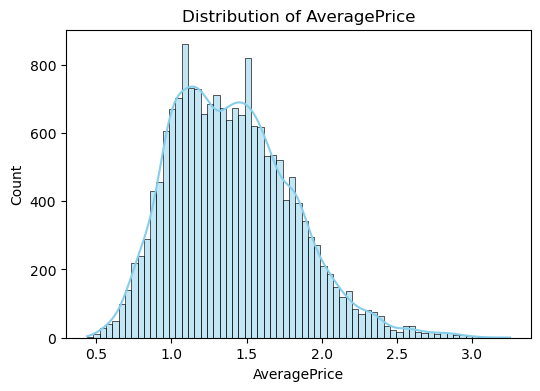

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


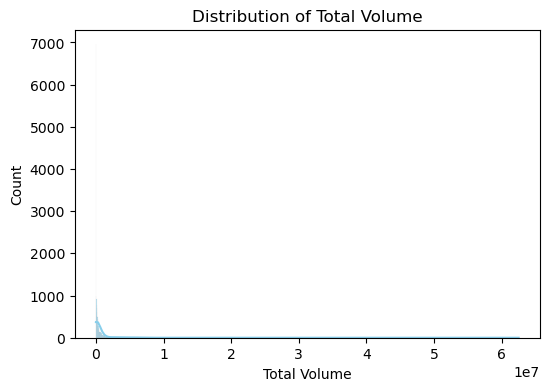

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


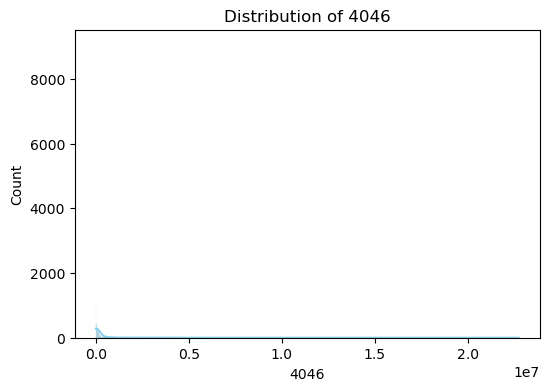

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


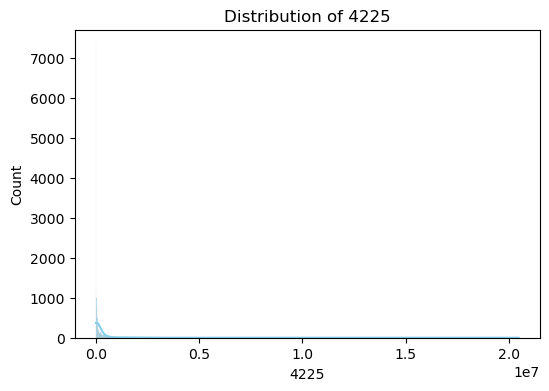

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


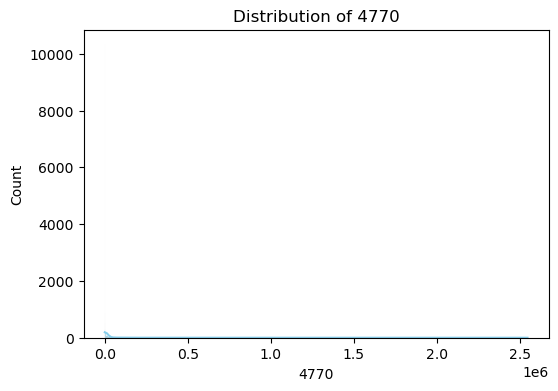

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


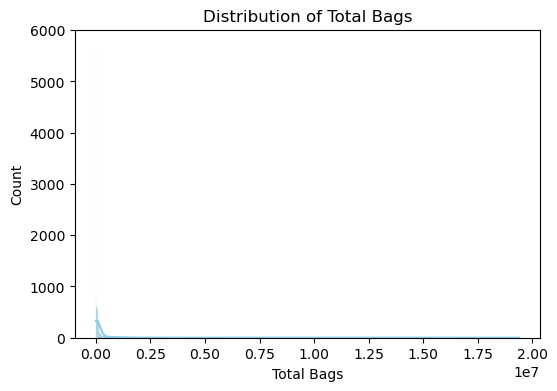

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


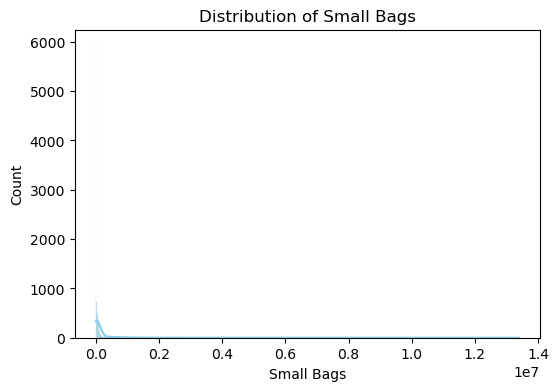

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


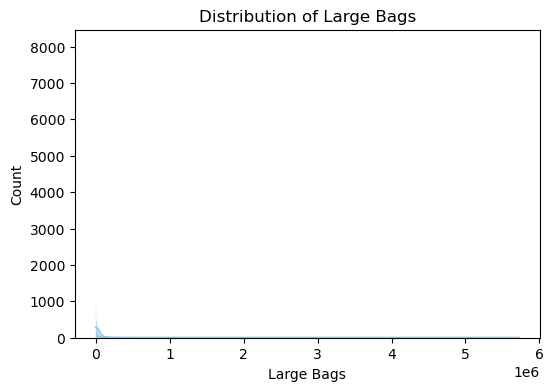

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Countplots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Time series plot for AveragePrice (if Date column exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
    plt.title('Average Avocado Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.show()

In [ ]:
df_clean.to_csv("Avocado_Cleaned.csv", index=False)

print("Cleaned dataset saved as 'Avocado_Cleaned.csv'")
print("Shape after cleaning:", df_clean.shape)